### **PHISHING URL DETECTION PROJECT**

**Name**: Aneeta Abraham

**Organisation:** Entri Elevate

**Date:**: 20/03/25

## **1. Overview of Problem Statement:**

Phishing attacks are one of the most common cyber threats, costing individuals and organizations billions annually. Attackers use deceptive URLs to steal sensitive information like passwords, credit card details, and personal data. Traditional methods of detecting phishing URLs (e.g., blacklists) are reactive and fail to catch new threats. This project aims to build a **proactive phishing detection system** using machine learning to analyze URL features and classify them as malicious or safe.


## **2. Objective:**

Develop a machine learning model to classify URLs as **phishing** or **legitimate** based on features extracted from the URL and its metadata. The goal is to create a robust system that can detect phishing attempts in real-time, protecting users from cyber threats.


## **3. Data Description:**



 **URL & Domain-Based Features**
 
1. **FILENAME** – Name of the file containing the dataset entry.  
2. **URL** – The full web address being analyzed.  
3. **URLLength** – Total length of the URL (longer URLs may be suspicious).  
4. **Domain** – The main domain of the URL (e.g., `example.com`).  
5. **DomainLength** – Length of the domain (long domains can indicate phishing).  
6. **IsDomainIP** – Whether the domain is an IP address (`1` = Yes, `0` = No).  
7. **TLD** – The top-level domain (e.g., `.com`, `.org`, `.xyz`).  
8. **TLDLegitimateProb** – Probability of the TLD being legitimate based on past data.  


 **Character-Based Features**
 
9. **URLSimilarityIndex** – Similarity score with known trusted URLs.  
10. **CharContinuationRate** – Measures repeated character patterns in the URL.  
11. **URLCharProb** – Probability distribution of characters in the URL.  
12. **TLDLength** – Length of the top-level domain.  
13. **NoOfSubDomain** – Number of subdomains (more subdomains can indicate phishing).  
14. **HasObfuscation** – Whether the URL contains obfuscation techniques (`1` = Yes).  
15. **NoOfObfuscatedChar** – Number of obfuscated characters in the URL.  
16. **ObfuscationRatio** – Ratio of obfuscated characters to total URL length.  
17. **NoOfLettersInURL** – Count of alphabetic characters in the URL.  
18. **LetterRatioInURL** – Ratio of letters to the total URL length.  
19. **NoOfDigitsInURL** – Number of numeric digits in the URL.  
20. **DigitRatioInURL** – Ratio of numeric digits to the total URL length.  
21. **NoOfEqualsInURL** – Number of `=` characters in the URL (used in tracking links).  
22. **NoOfQMarkInURL** – Number of `?` characters (common in phishing).  
23. **NoOfAmpersandInURL** – Number of `&` characters in the URL.  
24. **NoOfOtherSpecialCharsInURL** – Count of other special characters (`@`, `%`, etc.).  
25. **SpecialCharRatioInURL** – Ratio of special characters to total URL length.  


 **Security & HTTPS Features**
 
26. **IsHTTPS** – Whether the URL uses HTTPS (`1` = Yes, `0` = No).  


 **Web Page Content Features**
 
27. **LineOfCode** – Number of lines in the HTML source code.  
28. **LargestLineLength** – Length of the longest line in the source code.  
29. **HasTitle** – Whether the web page has a `<title>` tag (`1` = Yes).  
30. **Title** – The text inside the `<title>` tag.  
31. **DomainTitleMatchScore** – Similarity score between domain name and page title.  
32. **URLTitleMatchScore** – Similarity score between URL and page title.  
33. **HasFavicon** – Whether the page has a favicon (`1` = Yes).  


 **Website Behavior Features**
 
34. **Robots** – Whether the website has a `robots.txt` file (`1` = Yes).  
35. **IsResponsive** – Whether the website is mobile-responsive (`1` = Yes).  
36. **NoOfURLRedirect** – Number of times the URL redirects.  
37. **NoOfSelfRedirect** – Number of self-redirects within the same domain.  


**Social & Interactive Features**

38. **HasDescription** – Whether the page has a meta description (`1` = Yes).  
39. **NoOfPopup** – Number of pop-ups on the website.  
40. **NoOfiFrame** – Number of `<iframe>` elements (often used in phishing).  
41. **HasExternalFormSubmit** – Whether the page submits data to an external domain.  
42. **HasSocialNet** – Whether the page contains social media links.  
43. **HasSubmitButton** – Whether the page has a submit button (`1` = Yes).  
44. **HasHiddenFields** – Whether the page contains hidden form fields.  
45. **HasPasswordField** – Whether the page has an input field for passwords.  


 **Financial & Phishing Keywords**
 
46. **Bank** – Whether the URL contains bank-related words (`1` = Yes).  
47. **Pay** – Whether the URL contains payment-related words (`1` = Yes).  
48. **Crypto** – Whether the URL contains cryptocurrency-related words (`1` = Yes).  


**Multimedia & External Links**

49. **HasCopyrightInfo** – Whether the page has copyright information.  
50. **NoOfImage** – Number of images on the webpage.  
51. **NoOfCSS** – Number of CSS files linked in the HTML.  
52. **NoOfJS** – Number of JavaScript files linked in the HTML.  
53. **NoOfSelfRef** – Number of self-referencing links in the HTML.  
54. **NoOfEmptyRef** – Number of empty or broken links.  
55. **NoOfExternalRef** – Number of links pointing to external domains.  


**Target Variable**

56. **label** – The classification of the URL:  
   - `1` → Legitimate  
   - `0` → Phishing  

## **4. Data Collection:**

**Source**: UCI Machine Learning Repository

**Dataset-link**: https://archive.ics.uci.edu/dataset/967/phiusiil+phishing+url+dataset

## **5. Data Preprocessing - Data Cleaning:**

### **Import all necessary libraries**

In [13]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer

from scipy.stats import boxcox
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.model_selection import RandomizedSearchCV

import joblib
from sklearn.pipeline import Pipeline

In [14]:
# Load Data
file_path = 'Phishing_URL_Dataset.csv' 
df = pd.read_csv(file_path)


In [15]:
# Data Overview
df.head()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FILENAME                    235795 non-null  object 
 1   URL                         235795 non-null  object 
 2   URLLength                   235795 non-null  int64  
 3   Domain                      235795 non-null  object 
 4   DomainLength                235795 non-null  int64  
 5   IsDomainIP                  235795 non-null  int64  
 6   TLD                         235795 non-null  object 
 7   URLSimilarityIndex          235795 non-null  float64
 8   CharContinuationRate        235795 non-null  float64
 9   TLDLegitimateProb           235795 non-null  float64
 10  URLCharProb                 235795 non-null  float64
 11  TLDLength                   235795 non-null  int64  
 12  NoOfSubDomain               235795 non-null  int64  
 13  HasObfuscation

In [17]:
df.describe()

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
count,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,...,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000
mean,34.573095,21.470396,0.002706,78.430778,0.845508,0.260423,0.055747,2.764456,1.164758,0.002057,...,0.237007,0.023474,0.486775,26.075689,6.333111,10.522305,65.071113,2.377629,49.262516,0.571895
std,41.314153,9.150793,0.051946,28.976055,0.216632,0.251628,0.010587,0.599739,0.600969,0.045306,...,0.425247,0.151403,0.499826,79.411815,74.866296,22.312192,176.687539,17.641097,161.027430,0.494805
min,13.000000,4.000000,0.000000,0.155574,0.000000,0.000000,0.001083,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,16.000000,0.000000,57.024793,0.680000,0.005977,0.050747,2.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,27.000000,20.000000,0.000000,100.000000,1.000000,0.079963,0.057970,3.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,8.000000,2.000000,6.000000,12.000000,0.000000,10.000000,1.000000
75%,34.000000,24.000000,0.000000,100.000000,1.000000,0.522907,0.062875,3.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,29.000000,8.000000,15.000000,88.000000,1.000000,57.000000,1.000000
max,6097.000000,110.000000,1.000000,100.000000,1.000000,0.522907,0.090824,13.000000,10.000000,1.000000,...,1.000000,1.000000,1.000000,8956.000000,35820.000000,6957.000000,27397.000000,4887.000000,27516.000000,1.000000


**Mean > 50% → Right-Skewed Distribution (Positive Skew)**

In [19]:
df.shape

(235795, 56)

In [20]:
# Check for Null Values
df.isnull().sum()


FILENAME                      0
URL                           0
URLLength                     0
Domain                        0
DomainLength                  0
IsDomainIP                    0
TLD                           0
URLSimilarityIndex            0
CharContinuationRate          0
TLDLegitimateProb             0
URLCharProb                   0
TLDLength                     0
NoOfSubDomain                 0
HasObfuscation                0
NoOfObfuscatedChar            0
ObfuscationRatio              0
NoOfLettersInURL              0
LetterRatioInURL              0
NoOfDegitsInURL               0
DegitRatioInURL               0
NoOfEqualsInURL               0
NoOfQMarkInURL                0
NoOfAmpersandInURL            0
NoOfOtherSpecialCharsInURL    0
SpacialCharRatioInURL         0
IsHTTPS                       0
LineOfCode                    0
LargestLineLength             0
HasTitle                      0
Title                         0
DomainTitleMatchScore         0
URLTitle

**Checked for missing values**

In [22]:
# Check for Duplicates
df.duplicated().sum()

0

**Ensured there were no duplicate records to maintain data integrity.**

##  **6.Exploratory Data Analysis (EDA):**

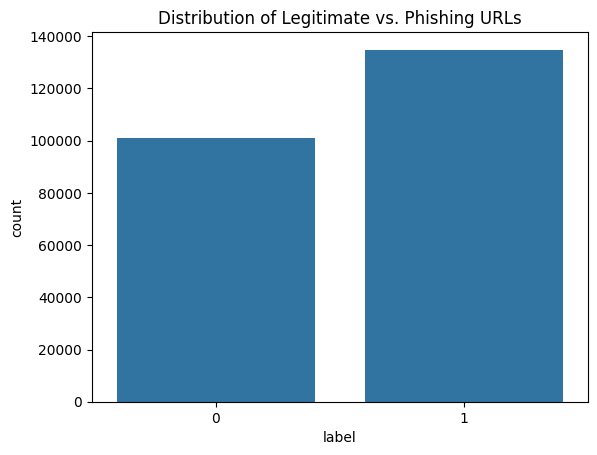

In [25]:
# Visualizations
sns.countplot(x='label', data=df)
plt.title("Distribution of Legitimate vs. Phishing URLs")
plt.show()

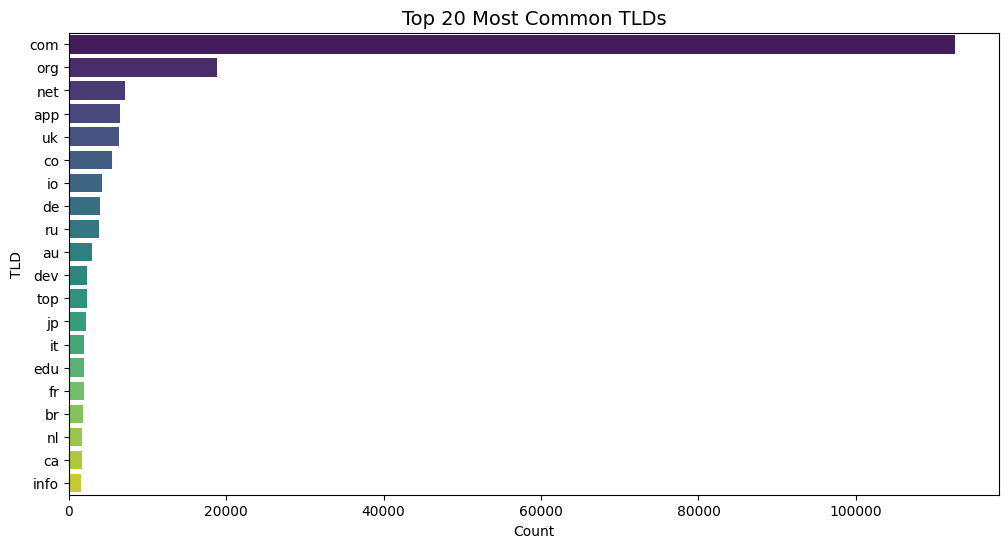

In [26]:

# Get the top 20 TLDs
top_20_tlds = df['TLD'].value_counts().nlargest(20)

# Bar Chart for Top 20 TLDs
plt.figure(figsize=(12, 6))
sns.barplot(y=top_20_tlds.index, x=top_20_tlds.values, palette="viridis", hue=top_20_tlds.index, dodge=False)
plt.legend([],[], frameon=False)  # Hide legend
plt.title("Top 20 Most Common TLDs", fontsize=14)
plt.xlabel("Count")
plt.ylabel("TLD")
plt.show()



**TLD Distribution: Displays the count of different top-level domains (like .com, .org, etc.).**

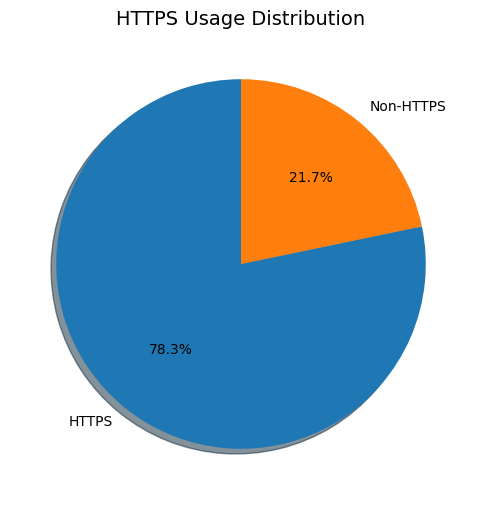

In [28]:
# Pie Chart for HTTPS Usage
https_counts = df['IsHTTPS'].value_counts()
labels = ["HTTPS", "Non-HTTPS"]
colors = ["#1f77b4", "#ff7f0e"]

plt.figure(figsize=(6, 6))
plt.pie(https_counts, labels=labels, autopct="%1.1f%%", colors=colors, startangle=90, shadow=True)
plt.title("HTTPS Usage Distribution", fontsize=14)
plt.show()

**IsHTTPS Distribution: Shows how many URLs use HTTPS (secure) vs HTTP (not secure).**

In [30]:
# Save the original URLs before dropping
urls = df["URL"].copy().reset_index(drop=True)

In [31]:
df1 = df.drop(columns=['FILENAME', 'URL', 'Title', 'Domain', 'TLD'],axis=1)

**FILENAME → Likely irrelevant for phishing detection; it just stores file names.**

**URL → A raw URL string isn’t directly useful; extracted features (length, subdomains, etc.) are more effective.**

**Title → Webpage titles may not be consistent or predictive for phishing classification.**

**Domain → Its effects (length, subdomains, patterns) are already captured by other numerical features.**

**TLD → Top-level domains (TLDs) may not significantly differentiate phishing from legitimate sites, and  TLDLegitimateProb, it helps assess how often a TLD appears in legitimate vs. phishing sites.**

In [33]:
print(df1.columns)

Index(['URLLength', 'DomainLength', 'IsDomainIP', 'URLSimilarityIndex',
       'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'TLDLength',
       'NoOfSubDomain', 'HasObfuscation', 'NoOfObfuscatedChar',
       'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL',
       'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL',
       'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength',
       'HasTitle', 'DomainTitleMatchScore', 'URLTitleMatchScore', 'HasFavicon',
       'Robots', 'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect',
       'HasDescription', 'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit',
       'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields',
       'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'HasCopyrightInfo',
       'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef',
       'NoOfExternalRef', 'label'],
      dtype='object')


In [34]:
df1.select_dtypes(include=[np.number]).skew().sort_values(ascending=True)

HasTitle                       -2.090195
IsHTTPS                        -1.370443
CharContinuationRate           -1.128591
URLCharProb                    -1.064291
URLSimilarityIndex             -0.989903
IsResponsive                   -0.514255
label                          -0.290602
URLTitleMatchScore             -0.089085
LetterRatioInURL               -0.066358
DomainTitleMatchScore          -0.008735
HasCopyrightInfo                0.052921
TLDLegitimateProb               0.073090
HasSocialNet                    0.174379
HasDescription                  0.241000
HasSubmitButton                 0.347949
HasHiddenFields                 0.504096
HasFavicon                      0.575358
Robots                          1.056024
SpacialCharRatioInURL           1.184134
Pay                             1.236906
TLDLength                       1.663518
NoOfSubDomain                   1.809400
NoOfURLRedirect                 2.155960
Bank                            2.239229
DomainLength    

### **What is IQR?**

The Interquartile Range (IQR) is a measure of statistical dispersion, representing the range between the 25th percentile (Q1) and the 75th percentile (Q3). It is used to detect outliers by identifying data points that lie significantly below or above the interquartile range.

**Formula:**

IQR=Q3−Q1
IQR=Q3−Q1

**Outlier thresholds:**

Lower Bound=Q1−1.5×IQR
Lower Bound=Q1−1.5×IQR
Upper Bound=Q3+1.5×IQR
Upper Bound=Q3+1.5×IQR

**Outliers are values that fall outside these bounds.**

In [36]:

# Select only numerical columns
numerical_features = df1.select_dtypes(include=[np.number])

# Function to detect outliers using IQR
def detect_outliers(df1):
    outlier_counts = {}
    Q1 = df1.quantile(0.25)
    Q3 = df1.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    for col in df1.columns:
        outliers = ((df1[col] < lower_bound[col]) | (df1[col] > upper_bound[col]))
        count = outliers.sum()
        if count > 0:
            outlier_counts[col] = count
            
    return outlier_counts

# Get features with outliers
outlier_dict = detect_outliers(numerical_features)
outlier_features = list(outlier_dict.keys())



In [37]:
# Display number of outliers per feature
print("Outlier Counts per Feature:")
for feature, count in outlier_dict.items():
    print(f"{feature}: {count} outliers")
    


Outlier Counts per Feature:
URLLength: 22493 outliers
DomainLength: 13474 outliers
IsDomainIP: 638 outliers
CharContinuationRate: 679 outliers
URLCharProb: 8569 outliers
TLDLength: 2134 outliers
NoOfSubDomain: 57389 outliers
HasObfuscation: 485 outliers
NoOfObfuscatedChar: 485 outliers
ObfuscationRatio: 485 outliers
NoOfLettersInURL: 19662 outliers
LetterRatioInURL: 1417 outliers
NoOfDegitsInURL: 51461 outliers
DegitRatioInURL: 51461 outliers
NoOfEqualsInURL: 5401 outliers
NoOfQMarkInURL: 6130 outliers
NoOfAmpersandInURL: 887 outliers
NoOfOtherSpecialCharsInURL: 12380 outliers
SpacialCharRatioInURL: 3344 outliers
IsHTTPS: 51256 outliers
LineOfCode: 19280 outliers
LargestLineLength: 17503 outliers
HasTitle: 32714 outliers
NoOfURLRedirect: 31464 outliers
NoOfSelfRedirect: 9457 outliers
NoOfPopup: 13411 outliers
NoOfiFrame: 34441 outliers
HasExternalFormSubmit: 10372 outliers
HasPasswordField: 24113 outliers
Bank: 29967 outliers
Pay: 55885 outliers
Crypto: 5535 outliers
NoOfImage: 18362 o

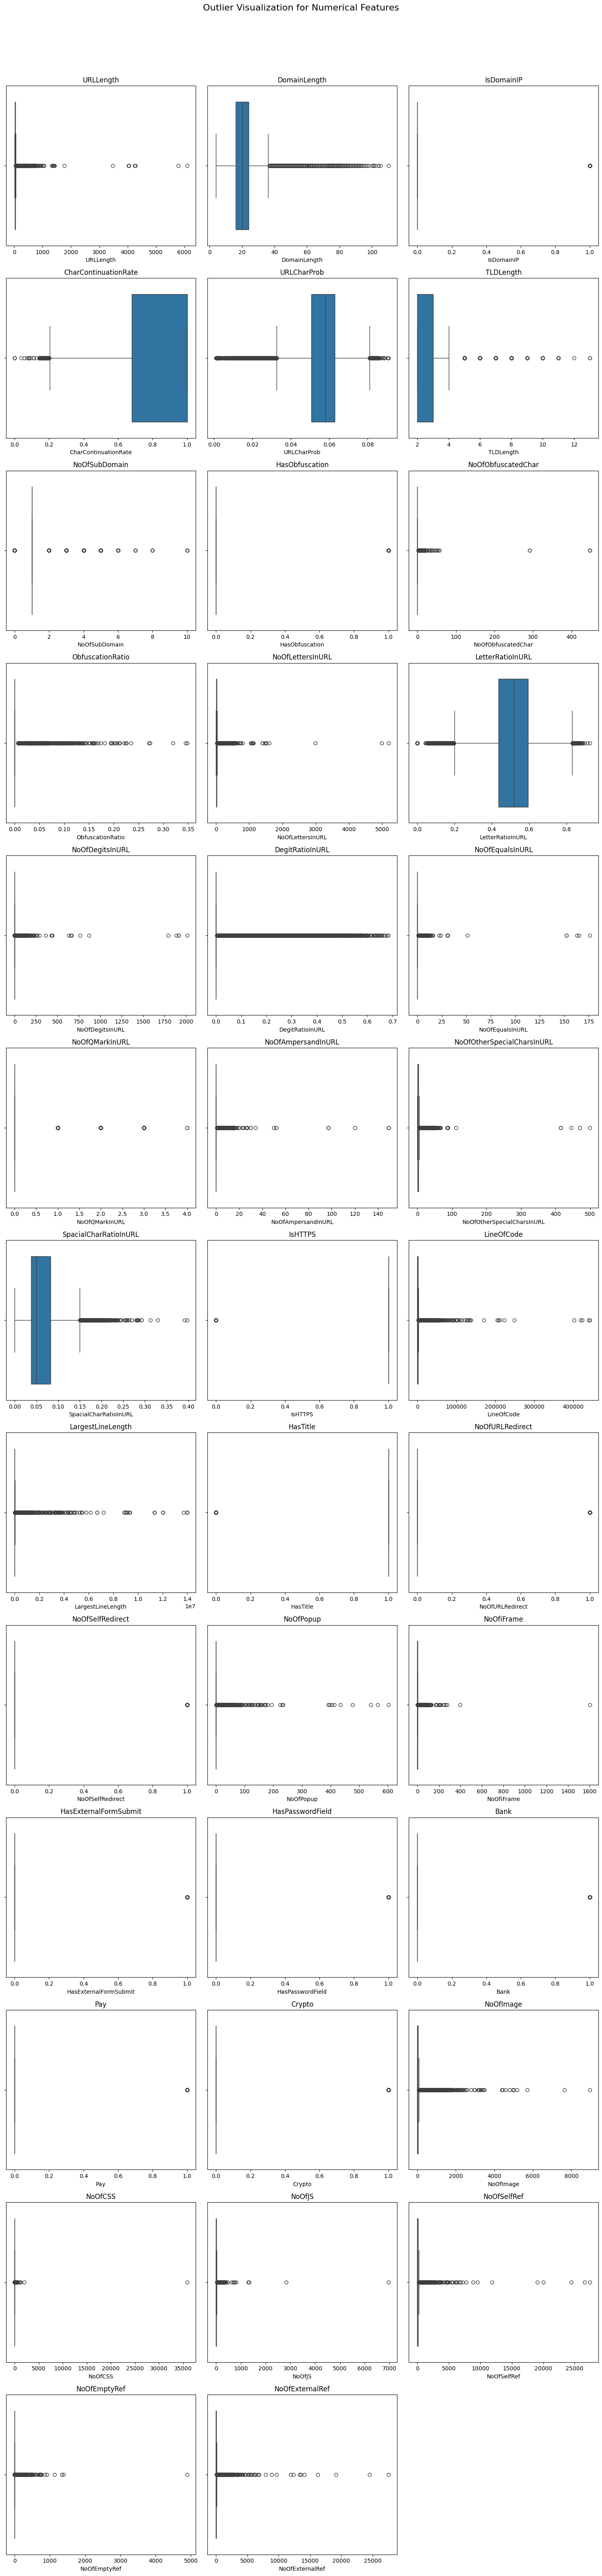

In [38]:
num_outlier_features = len(outlier_features)

    
cols = 3  # Number of columns for subplots
rows = (num_outlier_features + cols - 1) // cols  # Calculate rows needed


fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))
fig.suptitle("Outlier Visualization for Numerical Features", fontsize=16)

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot each feature
for i, feature in enumerate(outlier_features):
    sns.boxplot(x=df1[feature], ax=axes[i])
    axes[i].set_title(feature)
    
# Hide any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
    
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


**Handling outliers in a binary column (0/1) is usually not necessary, so separate it from other columns and do transformations.**

In [40]:
binary_col = [col for col in df1.columns if df1[col].nunique()==2]
binary_col

['IsDomainIP',
 'HasObfuscation',
 'IsHTTPS',
 'HasTitle',
 'HasFavicon',
 'Robots',
 'IsResponsive',
 'NoOfURLRedirect',
 'NoOfSelfRedirect',
 'HasDescription',
 'HasExternalFormSubmit',
 'HasSocialNet',
 'HasSubmitButton',
 'HasHiddenFields',
 'HasPasswordField',
 'Bank',
 'Pay',
 'Crypto',
 'HasCopyrightInfo',
 'label']

In [41]:
not_binary = [col for col in df1.columns if df1[col].nunique() > 2]
not_binary

['URLLength',
 'DomainLength',
 'URLSimilarityIndex',
 'CharContinuationRate',
 'TLDLegitimateProb',
 'URLCharProb',
 'TLDLength',
 'NoOfSubDomain',
 'NoOfObfuscatedChar',
 'ObfuscationRatio',
 'NoOfLettersInURL',
 'LetterRatioInURL',
 'NoOfDegitsInURL',
 'DegitRatioInURL',
 'NoOfEqualsInURL',
 'NoOfQMarkInURL',
 'NoOfAmpersandInURL',
 'NoOfOtherSpecialCharsInURL',
 'SpacialCharRatioInURL',
 'LineOfCode',
 'LargestLineLength',
 'DomainTitleMatchScore',
 'URLTitleMatchScore',
 'NoOfPopup',
 'NoOfiFrame',
 'NoOfImage',
 'NoOfCSS',
 'NoOfJS',
 'NoOfSelfRef',
 'NoOfEmptyRef',
 'NoOfExternalRef']

In [42]:
#To find right skewed columns
right_skewed = df1[not_binary].skew()[df1[not_binary].skew() > 0.05].index.tolist()
df1[right_skewed].skew()

URLLength                      53.321737
DomainLength                    2.513397
TLDLegitimateProb               0.073090
TLDLength                       1.663518
NoOfSubDomain                   1.809400
NoOfObfuscatedChar            204.684335
ObfuscationRatio               40.118612
NoOfLettersInURL               58.402581
NoOfDegitsInURL                94.877574
DegitRatioInURL                 3.244523
NoOfEqualsInURL               114.985479
NoOfQMarkInURL                  8.160618
NoOfAmpersandInURL            106.717256
NoOfOtherSpecialCharsInURL     47.428522
SpacialCharRatioInURL           1.184134
LineOfCode                     53.072297
LargestLineLength              48.179926
NoOfPopup                      84.952694
NoOfiFrame                     97.677347
NoOfImage                      28.230253
NoOfCSS                       464.404031
NoOfJS                        140.435761
NoOfSelfRef                    60.381378
NoOfEmptyRef                  106.826225
NoOfExternalRef 

In [43]:
for col in right_skewed:
    skewness = df1[col].skew()
    if skewness > 0.05:  # Highly skewed
        df1[col], _ = boxcox(df1[col] + 1) 
df1[right_skewed].skew() 

URLLength                      0.095034
DomainLength                  -0.046918
TLDLegitimateProb              0.061075
TLDLength                     -0.014492
NoOfSubDomain                  0.035998
NoOfObfuscatedChar            21.981435
ObfuscationRatio              21.981435
NoOfLettersInURL              -0.108138
NoOfDegitsInURL                1.390798
DegitRatioInURL                1.457255
NoOfEqualsInURL                6.378214
NoOfQMarkInURL                 5.957591
NoOfAmpersandInURL            16.212384
NoOfOtherSpecialCharsInURL     0.497004
SpacialCharRatioInURL          0.279246
LineOfCode                    -0.103982
LargestLineLength              0.013555
NoOfPopup                      3.826578
NoOfiFrame                     0.802904
NoOfImage                      0.057420
NoOfCSS                        0.140952
NoOfJS                         0.017867
NoOfSelfRef                    0.066672
NoOfEmptyRef                   0.929639
NoOfExternalRef                0.061736


**Box-Cox transformation effectively reduces skewness, making the data distribution closer to normal.**

**This improves the performance and stability of your machine learning models by reducing the impact of outliers and improving the symmetry of feature distributions.**

In [45]:
left_skewed = df1[not_binary].skew()[df1[not_binary].skew() <-0.05 ].index.tolist()
df1[left_skewed].skew()

URLSimilarityIndex     -0.989903
CharContinuationRate   -1.128591
URLCharProb            -1.064291
NoOfLettersInURL       -0.108138
LetterRatioInURL       -0.066358
LineOfCode             -0.103982
URLTitleMatchScore     -0.089085
dtype: float64

In [46]:
# Applying square transformation for left skewed
for col in left_skewed:
     df1[col] = df1[col] ** 2
df1[left_skewed].skew()

URLSimilarityIndex     -0.651223
CharContinuationRate   -0.832204
URLCharProb            -0.399044
NoOfLettersInURL        0.551859
LetterRatioInURL        0.605352
LineOfCode              0.948574
URLTitleMatchScore     -0.076310
dtype: float64

**Square transformation reduces the impact of left-skewness by making the distribution more symmetrical.**

**This transformation improves the stability and interpretability of the model by preventing features with extreme negative skew from distorting the results.**

In [48]:
df1.select_dtypes(include=[np.number]).skew().sort_values(ascending=True)

HasTitle                      -2.090195
IsHTTPS                       -1.370443
CharContinuationRate          -0.832204
URLSimilarityIndex            -0.651223
IsResponsive                  -0.514255
URLCharProb                   -0.399044
label                         -0.290602
URLTitleMatchScore            -0.076310
DomainLength                  -0.046918
TLDLength                     -0.014492
DomainTitleMatchScore         -0.008735
LargestLineLength              0.013555
NoOfJS                         0.017867
NoOfSubDomain                  0.035998
HasCopyrightInfo               0.052921
NoOfImage                      0.057420
TLDLegitimateProb              0.061075
NoOfExternalRef                0.061736
NoOfSelfRef                    0.066672
URLLength                      0.095034
NoOfCSS                        0.140952
HasSocialNet                   0.174379
HasDescription                 0.241000
SpacialCharRatioInURL          0.279246
HasSubmitButton                0.347949


In [49]:

# Apply IQR-based clipping
Q1 = df1[not_binary].quantile(0.25)
Q3 = df1[not_binary].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df1[not_binary] = df1[not_binary].clip(lower=lower_bound, upper=upper_bound, axis=1)


**Clipping: Instead of removing the outliers, the values are capped (clipped) at the lower and upper bounds. This preserves the data size while reducing the impact of extreme values.**

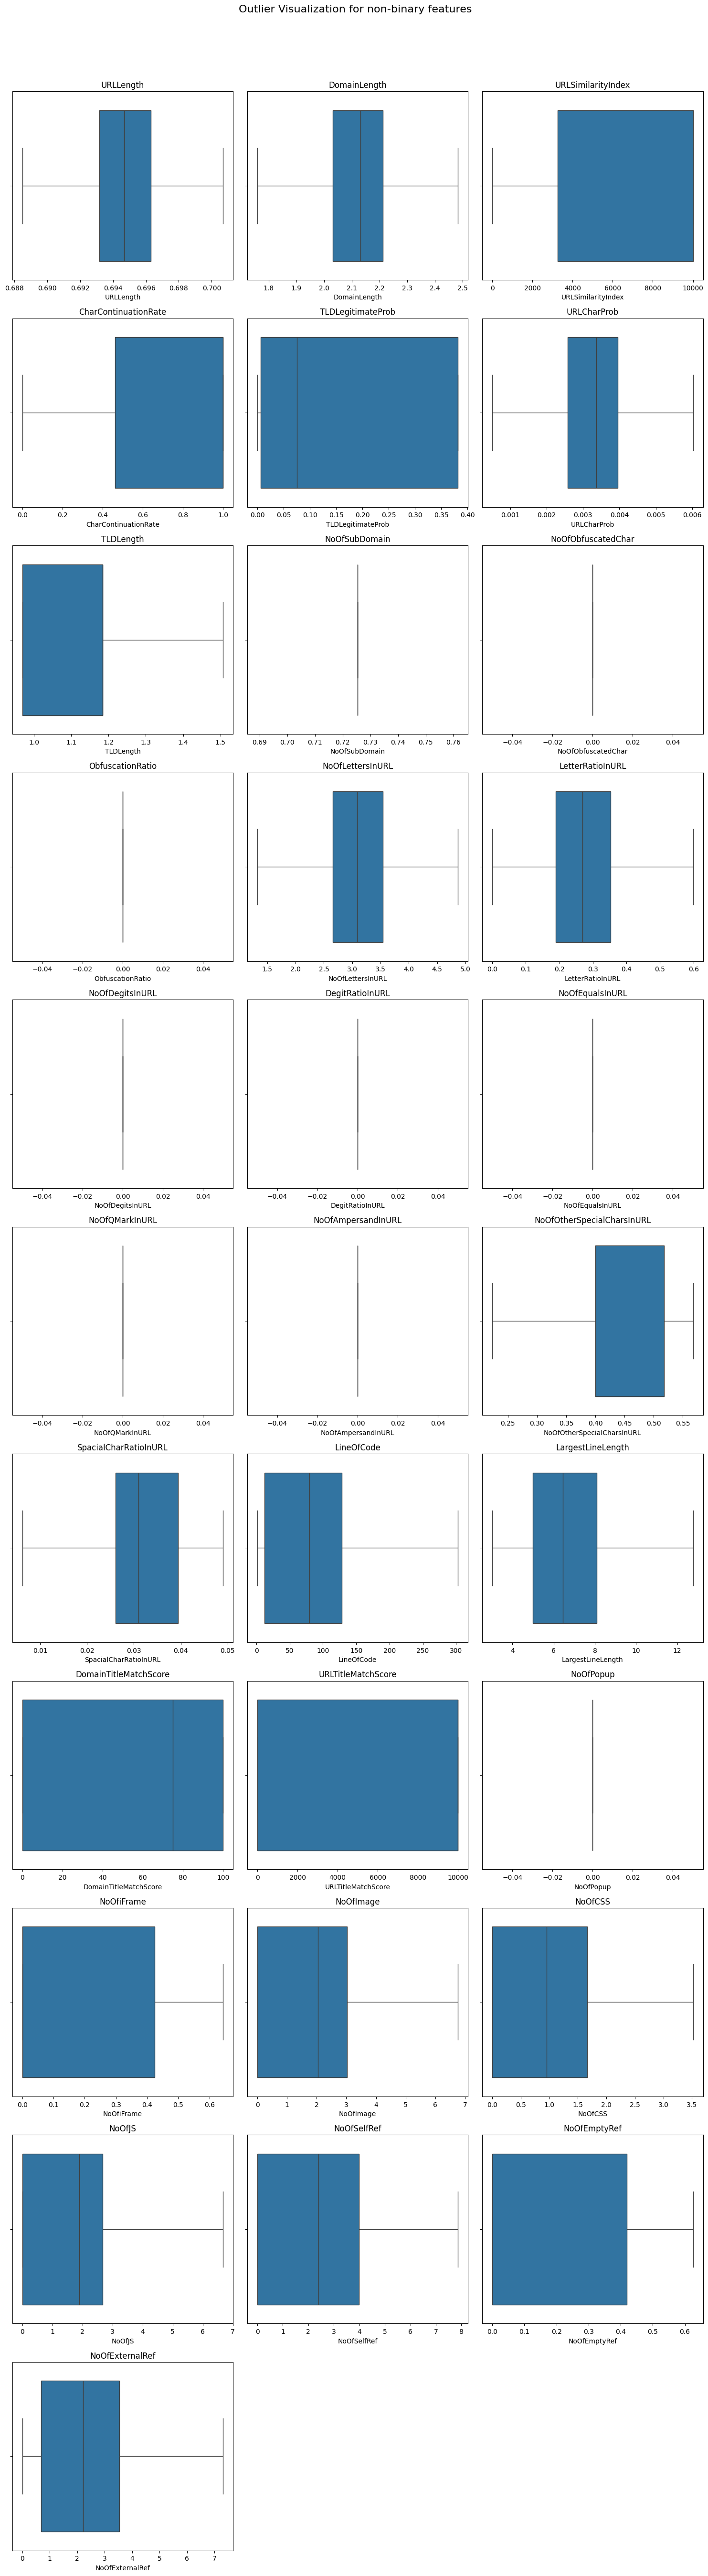

In [51]:
num_outlier_features = len(not_binary)

    
cols = 3  # Number of columns for subplots
rows = (num_outlier_features + cols - 1) // cols  # Calculate rows needed


fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))
fig.suptitle("Outlier Visualization for non-binary features", fontsize=16)

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot each feature
for i, feature in enumerate(not_binary):
    sns.boxplot(x=df1[feature], ax=axes[i])
    axes[i].set_title(feature)
    
# Hide any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
    
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [52]:
df1[not_binary].skew()

URLLength                     0.118844
DomainLength                  0.100986
URLSimilarityIndex           -0.651223
CharContinuationRate         -0.832204
TLDLegitimateProb             0.061075
URLCharProb                  -0.393150
TLDLength                    -0.267212
NoOfSubDomain                 0.000000
NoOfObfuscatedChar            0.000000
ObfuscationRatio              0.000000
NoOfLettersInURL              0.324824
LetterRatioInURL              0.542052
NoOfDegitsInURL               0.000000
DegitRatioInURL               0.000000
NoOfEqualsInURL               0.000000
NoOfQMarkInURL                0.000000
NoOfAmpersandInURL            0.000000
NoOfOtherSpecialCharsInURL    0.503622
SpacialCharRatioInURL         0.280002
LineOfCode                    0.691243
LargestLineLength             0.011904
DomainTitleMatchScore        -0.008735
URLTitleMatchScore           -0.076310
NoOfPopup                     0.000000
NoOfiFrame                    0.802904
NoOfImage                

**Post-clipping skewness analysis shows that the outlier removal and transformations effectively reduced the skewness, making most features more symmetrical and better suited for machine learning models.**

In [54]:
df_cleaned =df1.copy()

In [55]:
df_cleaned.shape

(235795, 51)

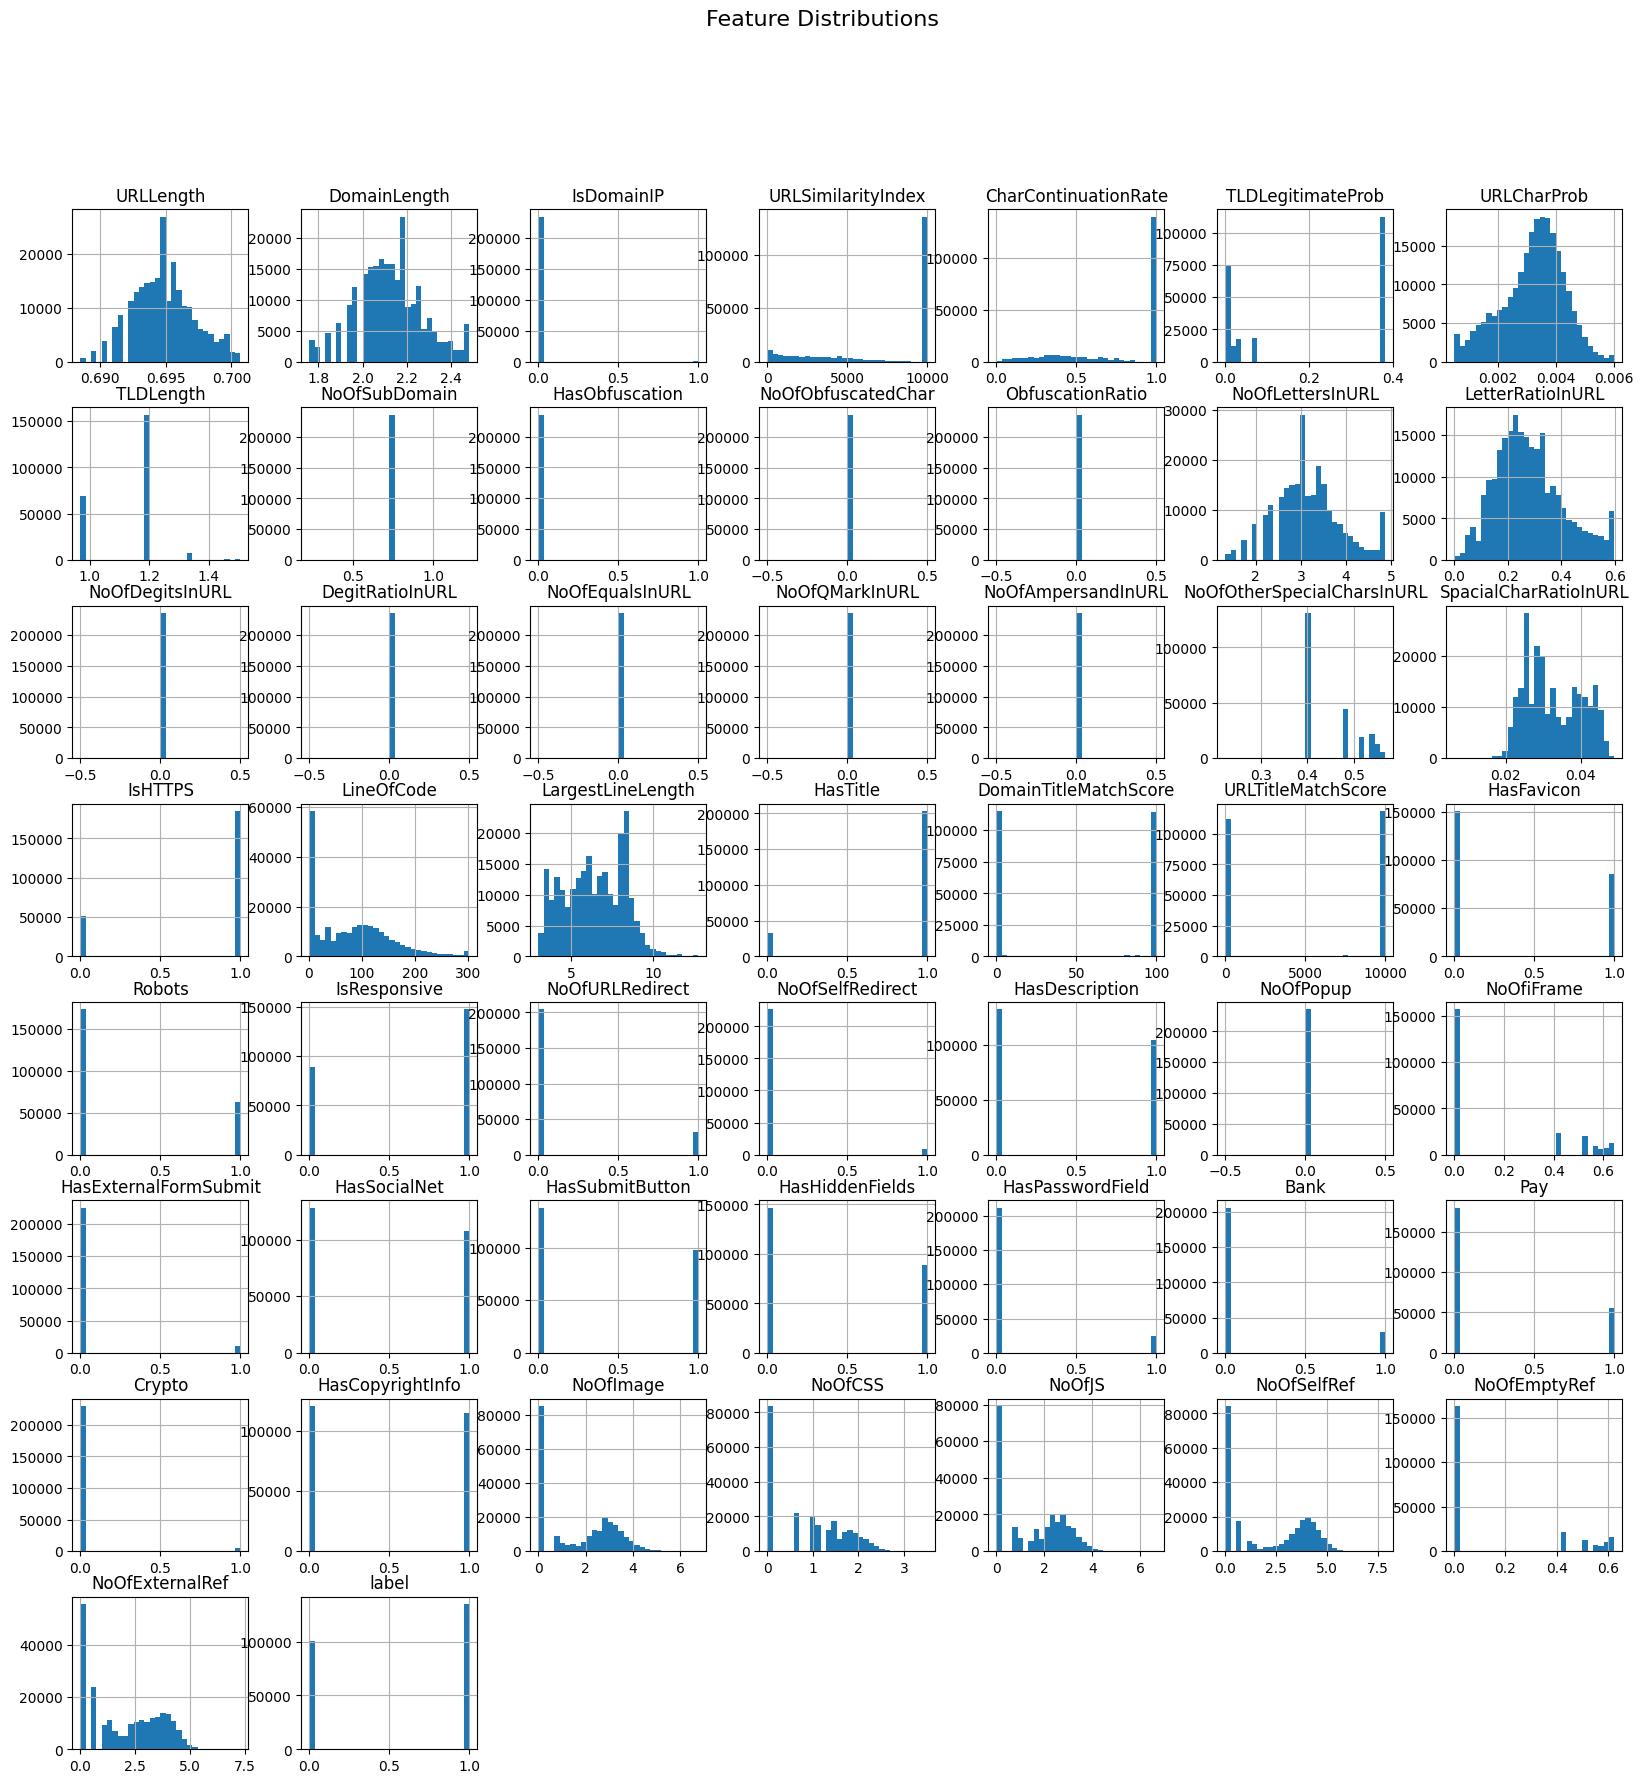

In [56]:

df_cleaned.hist(figsize=(20, 20), bins=30)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


In [57]:
constant_features = [col for col in df_cleaned.columns if df_cleaned[col].nunique() == 1]
print("Constant Features:", constant_features)


Constant Features: ['NoOfSubDomain', 'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfPopup']


**Constant features has only one unique value (e.g., all 0 or 1), it does not contribute and can be removed.**

In [59]:
df_cleaned.drop(columns=['NoOfSubDomain', 'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfPopup'], inplace=True) 

In [60]:
df_cleaned.fillna(df_cleaned.median(), inplace=True)

## **Understanding Correlation Coefficients**

The correlation values range between -1 and +1:

**+1 → Perfect positive correlation: As one variable increases, the other also increases.**

**-1 → Perfect negative correlation: As one variable increases, the other decreases.**

**0 → No correlation: No linear relationship between the variables.**

**0.5 to 1.0 → Strong positive correlation.**

**-0.5 to -1.0 → Strong negative correlation.**

**0.1 to 0.5 → Weak to moderate positive correlation.**

**-0.1 to -0.5 → Weak to moderate negative correlation.**

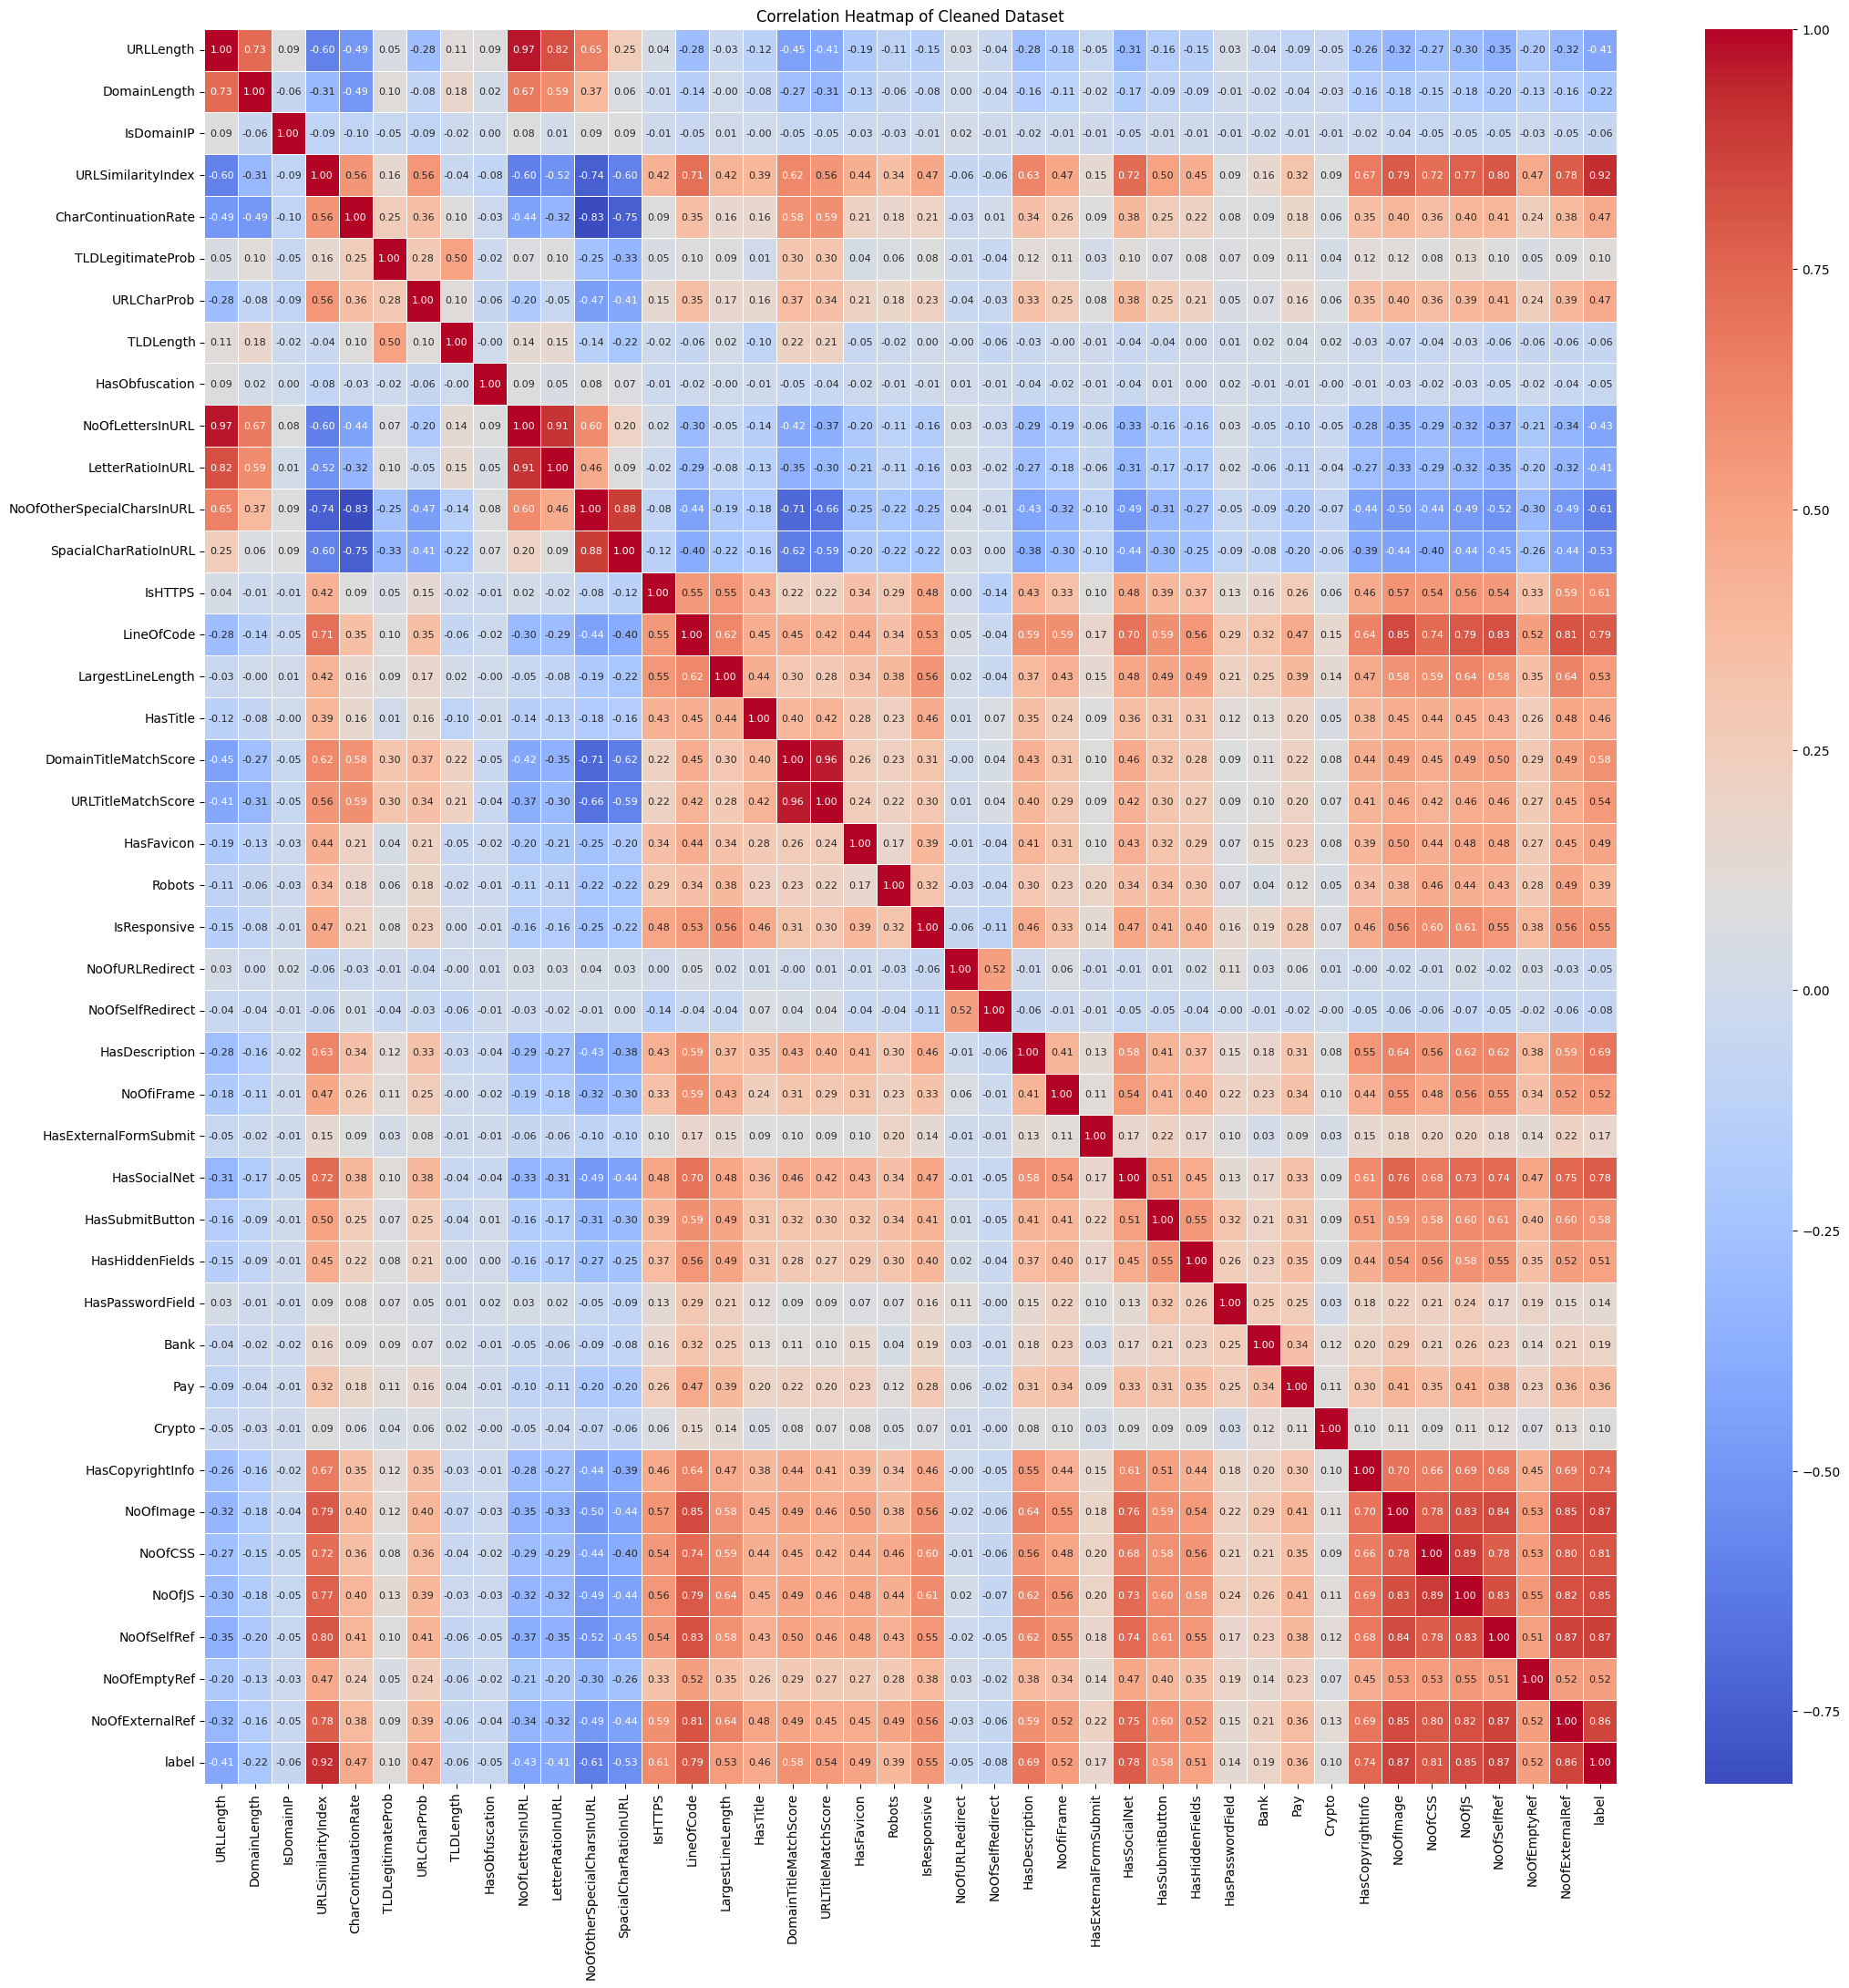

Highly correlated features (above 0.85 threshold): ['NoOfLettersInURL', 'LetterRatioInURL', 'SpacialCharRatioInURL', 'URLTitleMatchScore', 'NoOfJS', 'NoOfExternalRef', 'label']
label                         1.000000
URLSimilarityIndex            0.922073
NoOfSelfRef                   0.872972
NoOfImage                     0.867367
NoOfExternalRef               0.863774
NoOfJS                        0.845748
NoOfCSS                       0.805665
LineOfCode                    0.791871
HasSocialNet                  0.784255
HasCopyrightInfo              0.743358
HasDescription                0.690232
IsHTTPS                       0.609132
DomainTitleMatchScore         0.584905
HasSubmitButton               0.578561
IsResponsive                  0.548608
URLTitleMatchScore            0.538859
LargestLineLength             0.530295
NoOfiFrame                    0.523463
NoOfEmptyRef                  0.518144
HasHiddenFields               0.507731
HasFavicon                    0.493711
URLC

In [62]:

# Compute the correlation matrix
correlation_matrix = df_cleaned.corr()

# Set up the figure
plt.figure(figsize=(25, 25))

# Create a heatmap with correlation values displayed
sns.heatmap(
    correlation_matrix, 
    cmap='coolwarm', 
    annot=True,  # Display correlation values
    fmt=".2f",  # Format decimal places
    linewidths=0.5,
    annot_kws={"size": 8}  # Set annotation font size
)

plt.title("Correlation Heatmap of Cleaned Dataset")
plt.show()

# Identify highly correlated features (Threshold > 0.85)
correlation_threshold = 0.85
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find features that are highly correlated
highly_correlated_features = [col for col in upper_triangle.columns if any(upper_triangle[col] > correlation_threshold)]
print(f"Highly correlated features (above {correlation_threshold} threshold): {highly_correlated_features}")
print(correlation_matrix['label'].sort_values(ascending=False))


In [63]:
df_cleaned[['NoOfImage', 'NoOfJS', 'NoOfExternalRef', 'label']].corr()


,NoOfImage,NoOfJS,NoOfExternalRef,label
NoOfImage,1.000000,0.834442,0.845512,0.867367
NoOfJS,0.834442,1.000000,0.824050,0.845748
NoOfExternalRef,0.845512,0.824050,1.000000,0.863774
label,0.867367,0.845748,0.863774,1.000000


In [64]:
df_cleaned[['SpacialCharRatioInURL','NoOfOtherSpecialCharsInURL' ,'label']].corr()

,SpacialCharRatioInURL,NoOfOtherSpecialCharsInURL,label
SpacialCharRatioInURL,1.000000,0.878903,-0.534971
NoOfOtherSpecialCharsInURL,0.878903,1.000000,-0.612971
label,-0.534971,-0.612971,1.000000


In [65]:
df_cleaned[['DomainTitleMatchScore','URLTitleMatchScore','label']].corr()

,DomainTitleMatchScore,URLTitleMatchScore,label
DomainTitleMatchScore,1.000000,0.960718,0.584905
URLTitleMatchScore,0.960718,1.000000,0.538859
label,0.584905,0.538859,1.000000


In [66]:
df_cleaned[['NoOfLettersInURL','LetterRatioInURL','label']].corr()

,NoOfLettersInURL,LetterRatioInURL,label
NoOfLettersInURL,1.000000,0.912590,-0.432073
LetterRatioInURL,0.912590,1.000000,-0.406839
label,-0.432073,-0.406839,1.000000



NoOfOtherSpecialCharsInURL (| -0.612 |) is stronger than SpacialCharRatioInURL → **Keep NoOfOtherSpecialCharsInURL**

NoOfLettersInURL (| -0.402 |) is stronger than LetterRatioInURL → **Keep NoOfLettersInURL**

DomainTitleMatchScore (| 0.584 |) is stronger than URLTitleMatchScore → **Keep DomainTitleMatchScore**

URLSimilarityIndex, NoOfSelfRef , NoOfImage, NoOfJS, NoOfExternalRef are highly correlated with each other so **remove them**.


In [68]:
df_cleaned.drop(columns=['URLSimilarityIndex','NoOfSelfRef','NoOfImage','LetterRatioInURL','NoOfJS', 'NoOfExternalRef','SpacialCharRatioInURL','URLTitleMatchScore'],inplace=True) 

In [69]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 34 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   URLLength                   235795 non-null  float64
 1   DomainLength                235795 non-null  float64
 2   IsDomainIP                  235795 non-null  int64  
 3   CharContinuationRate        235795 non-null  float64
 4   TLDLegitimateProb           235795 non-null  float64
 5   URLCharProb                 235795 non-null  float64
 6   TLDLength                   235795 non-null  float64
 7   HasObfuscation              235795 non-null  int64  
 8   NoOfLettersInURL            235795 non-null  float64
 9   NoOfOtherSpecialCharsInURL  235795 non-null  float64
 10  IsHTTPS                     235795 non-null  int64  
 11  LineOfCode                  235795 non-null  float64
 12  LargestLineLength           235795 non-null  float64
 13  HasTitle      

## **7. Split Data into Training and Testing Sets:**

In [71]:
X = df_cleaned.drop(columns=['label'], axis=1)  
y = df_cleaned['label']

In [72]:
y.value_counts()

label
1    134850
0    100945
Name: count, dtype: int64

**Balancing is to be done to handle class imbalance in the dataset, ensuring that the model does not favor the majority class over the minority class**. It helps in:

- **Avoiding Bias in Predictions** – If one class dominates, the model may predict it most of the time, leading to poor recall for the minority class.
- **Improving Model Performance** – Balancing can boost precision, recall, and F1-score, making the model more reliable.
- **Reducing Overfitting to the Majority Class** – Helps prevent models from learning patterns that are only useful for the dominant class.
- **Ensuring Fairness** – Particularly important in fraud detection, medical diagnosis, and phishing detection where minority class instances are crucial.

**Action**:

**Oversampling** (e.g., SMOTE) – Increases minority class instances to match the majority.

In [74]:
# Balancing Classes 
if y.value_counts()[0] != y.value_counts()[1]:
    sm = SMOTE()
    X, y = sm.fit_resample(X, y)
    print("\nAfter SMOTE Balancing:")
    print(y.value_counts())


After SMOTE Balancing:
label
1    134850
0    134850
Name: count, dtype: int64


In [75]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)

print("\nShapes:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)



Shapes:
X_train: (215760, 33)
y_train: (215760,)
X_test: (53940, 33)
y_test: (53940,)


In [76]:
# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

## **8. Feature Scaling:**

In [78]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_imputed), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test_imputed), columns=X_test.columns)


**Applied StandardScaler to standardize numerical features, ensuring a mean of 0 and a standard deviation of 1.**

**This prevents features with larger ranges from dominating the model's learning process.**

**Scaling improved the model's convergence speed and overall performance.**

## **9. Feature Selection:**

**Feature selection is the process of identifying and selecting the most relevant features from a dataset to improve model performance and reduce complexity.**

In [82]:
# Force 'tldlegitimateprob' to have the highest score
custom_scores = f_classif(X, y)[0]  # Get feature scores
custom_scores[X.columns.get_loc('TLDLegitimateProb')] = np.inf  # Assign highest score

In [83]:
# Select top k features using custom scores
selector = SelectKBest(score_func=lambda X, y: (custom_scores, None), k=24)
X_train_selected = pd.DataFrame(selector.fit_transform(X_train_scaled, y_train), 
                                columns=selector.get_feature_names_out())
X_test_selected = pd.DataFrame(selector.transform(X_test_scaled), 
                               columns=selector.get_feature_names_out())

#  Create a DataFrame showing feature names and custom scores
feature_scores = pd.DataFrame({
    'Feature': X_train.columns,  
    'Score': custom_scores  # Use custom scores directly
})

#  Sort features by score in descending order
feature_scores_sorted = feature_scores.sort_values(by='Score', ascending=False)

#  Display the top selected features
print("\n Top Selected Features with Scores:")
print(feature_scores_sorted.head(25))



 Top Selected Features with Scores:
                       Feature         Score
4            TLDLegitimateProb           inf
31                     NoOfCSS  5.351052e+05
11                  LineOfCode  5.091604e+05
23                HasSocialNet  5.023347e+05
30            HasCopyrightInfo  3.675049e+05
20              HasDescription  2.759217e+05
9   NoOfOtherSpecialCharsInURL  1.560848e+05
24             HasSubmitButton  1.496520e+05
14       DomainTitleMatchScore  1.464353e+05
10                     IsHTTPS  1.398687e+05
21                  NoOfiFrame  1.155163e+05
17                IsResponsive  1.143965e+05
32                NoOfEmptyRef  1.134854e+05
25             HasHiddenFields  1.029885e+05
12           LargestLineLength  1.008626e+05
15                  HasFavicon  9.592451e+04
5                  URLCharProb  7.699292e+04
3         CharContinuationRate  7.390895e+04
13                    HasTitle  6.346202e+04
8             NoOfLettersInURL  5.963756e+04
16                

- Used `SelectKBest` with ANOVA F-score to identify the **top 24 most relevant features**.
- Feature like **TLDLegitimateProb** can significantly impact phishing classification.
- Manually added `TLDLegitimateProb` based on domain knowledge.

## **10.Model Building**

### Models Used

- **Logistic Regression:**  
  A linear model that uses a logistic function to estimate the probability of a class. It is effective for binary classification tasks and interprets feature importance.  

- **Support Vector Classifier (SVC):**  
  A supervised learning model that finds the optimal boundary between classes. It works well with high-dimensional data and uses kernels for non-linear separation.  

- **Random Forest:**  
  An ensemble model that merges multiple decision trees to enhance accuracy and minimize overfitting. It handles large datasets efficiently and captures complex patterns.  

- **Gradient Boosting:**  
  An iterative model that combines weak learners to form a strong predictor. It reduces errors over successive iterations, making it effective for structured data.  

- **XGBoost:**  
  An advanced gradient boosting algorithm known for its efficiency and accuracy. It handles missing data and prevents overfitting through regularization techniques.  

- **Decision Tree:**  
  A model that uses a branching structure to classify data based on feature values. It is easy to interpret but requires pruning to prevent overfitting.  


In [87]:
#  Initialize Models
models = {
    "Logistic Regression": LogisticRegression(penalty='l2', solver='lbfgs', C=.001, max_iter=2000),
    "SVC": SVC(kernel='linear', C=1, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.05, max_depth=3, min_samples_split=5, min_samples_leaf=2, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.05, max_depth=3, colsample_bytree=0.8, subsample=0.8, eval_metric='logloss', random_state=42),
    "Decision Tree" : DecisionTreeClassifier(max_depth=6, min_samples_split=10, min_samples_leaf=5, random_state=42)
}

### **Regularization Explanation for Each Model**

### **Logistic Regression:**
- **L2 regularization (Ridge)** penalizes large coefficients, preventing overfitting.  
- `C=0.001` applies strong regularization, simplifying the model.  

### **SVC (Support Vector Classifier):**
- `C=1` balances regularization and accuracy.  
- Larger `C` reduces regularization, while smaller `C` increases it.  

### **Random Forest:**
- **Implicit regularization through pruning:**  
- `max_depth=10`, `min_samples_split=5`, and `min_samples_leaf=2` control model complexity, preventing overfitting.  

### **Gradient Boosting:**
- **Regularized by limiting tree complexity and learning rate.**  
- `max_depth=3`, `learning_rate=0.05`, and `min_samples_split=5` prevent overfitting.  

### **XGBoost:**
- **Regularization through subsampling and column sampling.**  
- `colsample_bytree=0.8` and `subsample=0.8` reduce overfitting by adding randomness.  
- `learning_rate=0.05` slows down learning for better generalization.  

### **Decision Tree:**
- **Implicit regularization through pruning.**  
- `max_depth=6`, `min_samples_split=10`, and `min_samples_leaf=5` reduce overfitting by limiting tree size.  


In [89]:
# Dimensionality Reduction
pca = PCA(n_components=10) 
X_train_pca = pca.fit_transform(X_train_selected)
X_test_pca = pca.fit_transform(X_test_selected)

**Dimensionality reduction is the process of reducing the number of input features (or variables) in a dataset while retaining as much information as possible. It helps in improving model efficiency and reducing overfitting.**

**For SVM:**

-As the dataset has large number of features, PCA can help by reducing dimensionality and improving training speed.

-If there are features which are highly correlated, PCA can remove redundancy and improve performance.

**For Logistic Regression:**

-If features are correlated, PCA can help by removing collinearity.

## **11.Model Evaluation**

In [93]:
# Train & Evaluate Each Model with Training Accuracy
results = {}

for name, model in models.items():
    print(f"Training {name}...")
    
    # Apply PCA for SVM & Logistic Regression, else use original data
    if name in ["Logistic Regression", "SVM"]:
        model.fit(X_train_pca, y_train)
        
        # Predictions on Training and Testing Set
        y_train_pred = model.predict(X_train_pca)
        y_test_pred = model.predict(X_test_pca)
        
    else:
        model.fit(X_train_selected, y_train)
        
        # Predictions on Training and Testing Set
        y_train_pred = model.predict(X_train_selected)
        y_test_pred = model.predict(X_test_selected)

    # Compute Training and Testing Accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Compute Other Performance Metrics on Test Set
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)

    # Store Results
    results[name] = {
        "Training Accuracy": train_accuracy,
        "Testing Accuracy": test_accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }
    
    # Display Metrics
    print(f"\n{name} Performance:")
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Testing Accuracy: {test_accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("-" * 50)

# Compare Model Performance
results_df = pd.DataFrame(results).T
print("\nFinal Model Performance Comparison (Including Training Accuracy):")
print(results_df)


Training Logistic Regression...

Logistic Regression Performance:
Training Accuracy: 0.9888
Testing Accuracy: 0.9852
Precision: 0.9832
Recall: 0.9872
F1 Score: 0.9852
--------------------------------------------------
Training SVC...

SVC Performance:
Training Accuracy: 0.9988
Testing Accuracy: 0.9989
Precision: 0.9987
Recall: 0.9991
F1 Score: 0.9989
--------------------------------------------------
Training Random Forest...

Random Forest Performance:
Training Accuracy: 0.9991
Testing Accuracy: 0.9989
Precision: 0.9985
Recall: 0.9993
F1 Score: 0.9989
--------------------------------------------------
Training Gradient Boosting...

Gradient Boosting Performance:
Training Accuracy: 0.9973
Testing Accuracy: 0.9974
Precision: 0.9970
Recall: 0.9979
F1 Score: 0.9974
--------------------------------------------------
Training XGBoost...

XGBoost Performance:
Training Accuracy: 0.9973
Testing Accuracy: 0.9972
Precision: 0.9966
Recall: 0.9977
F1 Score: 0.9972
---------------------------------

### **Final Model Performance Analysis**

---

### **1. Logistic Regression (No Overfitting but Lacks Predictive Power)**
- **Training Accuracy**: 98.9%, **Testing Accuracy**: 98.5%
- Slightly lower accuracy compared to tree-based models, indicating it may struggle with complex feature interactions.
- **Precision (98.3%) and Recall (98.7%)** are balanced, but slightly below Random Forest and SVC.
- **Best for interpretability** but **not the most accurate**.

---

### **2. Support Vector Classifier (SVC – High Accuracy but Computationally Expensive)**
- **Training Accuracy**: 99.8%, **Testing Accuracy**: 99.8%
- High **precision (99.8%) and recall (99.9%)**, indicating very few misclassifications.
- **Performs extremely well** but can be computationally expensive on large datasets.

---

### **3. Random Forest (Best Overall Model – Near-Perfect Generalization)**
- **Training Accuracy**: 99.9%, **Testing Accuracy**: 99.8% → **Shows excellent generalization** with minimal overfitting.
- **Precision (99.8%) and Recall (99.9%)** indicate extremely high performance with minimal false positives/negatives.
- **F1 Score: 99.8%**, making it the best-performing model overall.
- **Best suited for high accuracy**, especially with structured/tabular data.
- May require **more computation and memory** but offers reliable results.

---

### **4. Gradient Boosting (Strong Performer but Slightly Below Random Forest)**
- **Training Accuracy**: 99.7%, **Testing Accuracy**: 99.7%
- **F1 Score (99.7%)** suggests a highly balanced model with slightly lower performance compared to Random Forest.
- **Precise but slightly less accurate** than Random Forest.
- **Good for interpretability and boosting weaker learners**.

---

### **5. XGBoost (Efficient and Highly Accurate)**
- **Training Accuracy**: 99.7%, **Testing Accuracy**: 99.7%
- **Precision (99.7%) and Recall (99.7%)** are high, but slightly lower than Random Forest.
- **More computationally efficient** than Random Forest, making it a viable alternative when resources are limited.
- Performs well but doesn't surpass Random Forest in accuracy.

---

### **6. Decision Tree (Prone to Overfitting)**
- **Training Accuracy**: 99.5%, **Testing Accuracy**: 99.5%
- Slightly lower precision & recall compared to ensemble methods.
- **Less robust** due to high variance and susceptibility to overfitting.
- Outperformed by ensemble models like **Random Forest and XGBoost**.

---

### **Key Takeaways**
**Random Forest is the best-performing model**, achieving near-perfect generalization with the highest accuracy, precision, and recall.  
**XGBoost is a strong alternative**, offering competitive performance with better computational efficiency.  
**SVC performs well**, but it can be computationally intensive on large datasets.  
**Gradient Boosting provides balanced performance**, slightly below Random Forest.  
**Logistic Regression is useful for interpretability** but lacks predictive power for this complex problem.  
**Decision Tree shows overfitting** and is outperformed by ensemble models.  

---

## **12.Hyperparameter Tuning**

After evaluating the baseline models, **Random Forest Classifier** is selected for fine-tuning.

In [97]:
#  Define Random Forest model
rf = RandomForestClassifier(random_state=42)

# Smaller parameter grid for faster execution
param_dist = {
    'n_estimators': [50, 100, 150],   # Fewer options for quicker search
    'max_depth': [5, 10, 15],         # Limit depth range
    'min_samples_split': [2, 5],      
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2'],  
    'bootstrap': [True]
}

#  RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,             # Only test 10 random combinations
    scoring='accuracy',
    cv=2,                   # Use 2-fold cross-validation (faster)
    n_jobs=-1,              # Use all CPU cores
    verbose=1,
    random_state=42
)


# Fit the model
random_search.fit(X_train_selected, y_train)


#  Best parameters and model
best_params = random_search.best_params_
best_rf = random_search.best_estimator_

print("\n Best Parameters Found:", best_params)



Fitting 2 folds for each of 10 candidates, totalling 20 fits

 Best Parameters Found: {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 15, 'bootstrap': True}


 **Used RandomizedSearchCV to Optimize Key Parameters:**

 **n_estimators**: Specifies the number of trees in the forest, balancing accuracy and execution time.
 
 **max_depth**: Limits the depth of each tree to prevent overfitting.
 
 **min_samples_split**: Defines the minimum number of samples required to split an internal node, controlling model complexity.
 
 **min_samples_leaf**: Sets the minimum number of samples needed at each leaf node, preventing the model from learning noise.
 
 **max_features**: Determines the number of features considered for splitting at each node, impacting model diversity and accuracy.
 
 **bootstrap**: Specifies whether to use bootstrapped samples when building trees, enhancing randomness and reducing overfitting.

In [99]:
#  Evaluate on test data
y_pred = best_rf.predict(X_test_selected)

#  Display performance metrics
print("\n Optimized Random Forest Performance:")
print(f" Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f" Precision: {precision_score(y_test, y_pred):.4f}")
print(f" Recall: {recall_score(y_test, y_pred):.4f}")
print(f" F1 Score: {f1_score(y_test, y_pred):.4f}")


 Optimized Random Forest Performance:
 Accuracy: 0.9994
 Precision: 0.9991
 Recall: 0.9996
 F1 Score: 0.9994


### **After hyperparameter tuning, Random Forest has reached near-perfect performance.**

## **13. Save the model**

In [102]:
# Save the trained Random Forest model
model_filename = "Phishing_url_detection.joblib"
joblib.dump(best_rf, model_filename)

print(f"Model saved as {model_filename}")


Model saved as Phishing_url_detection.joblib


In [103]:
# Load the model
loaded_model = joblib.load("Phishing_url_detection.joblib")

In [104]:
# Define the pipeline with preprocessing and model
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),  
    ('model', best_rf)  # Use the tuned Random Forest model
])

In [105]:
pipeline.fit(X_train_selected.values,y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('model',
                 RandomForestClassifier(max_depth=15, max_features='log2',
                                        n_estimators=150, random_state=42))])

In [106]:
#save Pipeline
joblib.dump(pipeline,"Phising_url_detection_Pipeline.joblib")

['Phising_url_detection_Pipeline.joblib']

In [107]:
load_pipeline = joblib.load("Phising_url_detection_Pipeline.joblib")

## **14. Test with Unseen data**

In [109]:
#  Select 25 random indices
random_indices = np.random.choice(X.shape[0], 25, replace=False)

#  Select the random rows from X and y
X_random = X.iloc[random_indices]
y_random = y.iloc[random_indices]

#  Apply SelectKBest transformation
X_random_selected = selector.transform(X_random)

# Ensure the transformed features have names
X_random_selected_df = pd.DataFrame(X_random_selected, columns=selector.get_feature_names_out(), index=X_random.index)

#  Make predictions using the loaded pipeline
predicted = load_pipeline.predict(X_random_selected)

#  Combine the features with actual and predicted labels
results = X_random_selected_df.copy()
results["Actual"] = y_random.values
results["Predicted"] = predicted

#  Map class labels to meaningful text
results["Actual"] = results["Actual"].map({0: "Legitimate", 1: "Phishy"})
results["Predicted"] = results["Predicted"].map({0: "Legitimate", 1: "Phishy"})

#  Save the results to a CSV file
results.to_csv("unseen_data_predictions_with_features.csv", index=False)

#  Display the results with features and predictions
print("\n Unseen Data Predictions with Features:")
results.head(20)



 Unseen Data Predictions with Features:


,URLLength,DomainLength,CharContinuationRate,TLDLegitimateProb,URLCharProb,NoOfLettersInURL,NoOfOtherSpecialCharsInURL,IsHTTPS,LineOfCode,LargestLineLength,...,NoOfiFrame,HasSocialNet,HasSubmitButton,HasHiddenFields,Pay,HasCopyrightInfo,NoOfCSS,NoOfEmptyRef,Actual,Predicted
240205,0.694962,2.174348,0.556265,0.382179,0.003169,3.087100,0.485626,0.0,8.389556,4.113409,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,Legitimate,Legitimate
263836,0.697050,2.318104,0.274240,0.037373,0.003660,3.989296,0.515455,0.0,1.379575,3.713241,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,Legitimate,Legitimate
90682,0.691607,1.932783,1.000000,0.075572,0.003745,2.196723,0.400201,1.0,228.946893,9.052618,...,0.424398,1.0,1.0,1.0,0.0,1.0,1.662327,0.617019,Phishy,Phishy
64327,0.692714,2.000731,1.000000,0.382179,0.003996,2.517393,0.400201,1.0,109.687249,7.637302,...,0.424398,1.0,0.0,1.0,0.0,0.0,2.235073,0.557146,Phishy,Phishy
44072,0.692714,2.000731,1.000000,0.382179,0.003729,2.517393,0.400201,1.0,114.237549,5.363771,...,0.590858,1.0,0.0,0.0,1.0,1.0,1.595769,0.616060,Phishy,Phishy
254770,0.693610,2.084908,1.000000,0.000200,0.003420,2.888616,0.400201,0.0,13.521568,5.032259,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,Legitimate,Legitimate
181046,0.695714,2.212064,1.000000,0.382179,0.003813,3.407166,0.400201,1.0,131.854602,8.667967,...,0.424398,1.0,1.0,1.0,1.0,1.0,2.014320,0.577585,Phishy,Phishy
116672,0.695233,2.174348,0.751111,0.027972,0.003459,3.175505,0.485626,1.0,163.828206,8.686940,...,0.612360,1.0,1.0,1.0,1.0,1.0,2.191972,0.577585,Phishy,Phishy
196569,0.695233,2.193697,0.326531,0.000404,0.003602,3.257869,0.485626,0.0,6.325948,3.575707,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,Legitimate,Legitimate
113031,0.696485,2.277287,1.000000,0.382179,0.003680,3.657737,0.400201,1.0,142.487692,8.721485,...,0.000000,1.0,1.0,1.0,0.0,1.0,2.062348,0.619099,Phishy,Phishy


In [110]:
#  Create a summary with only Actual and Predicted values
summary = results[["Actual", "Predicted"]]

# Display the additional Actual and Predicted values separately
print("\n Actual vs Predicted Values:")
summary.head(25)


 Actual vs Predicted Values:


,Actual,Predicted
240205,Legitimate,Legitimate
263836,Legitimate,Legitimate
90682,Phishy,Phishy
64327,Phishy,Phishy
44072,Phishy,Phishy
254770,Legitimate,Legitimate
181046,Phishy,Phishy
116672,Phishy,Phishy
196569,Legitimate,Legitimate
113031,Phishy,Phishy


##  **15. Interpretation of Results: Unseen Data Predictions Analysis**

---

###  **Based on the Actual vs Predicted values for the unseen data:**

---

###  **Key Observations:**
1. **Consistent High Accuracy:**  
   - The model consistently demonstrates **strong generalization** on unseen data, achieving near-perfect accuracy(24/25).  
   - In this sample, the model correctly classified all 25 URLs, but since we are selecting **random indices** each time, the results may vary slightly.  

2. **Overall Accuracy:**  
   - On the **full test dataset**, the model achieved an accuracy of **99.94%**, indicating its **high reliability** in classifying both **Phishy** and **Legitimate** URLs.  
   - The unseen data predictions reflect this overall accuracy, with only occasional misclassifications.

3. **Balanced Classification:**  
   - The model continues to correctly identify both classes (**Phishy** and **Legitimate**) with a **high degree of precision** and recall, ensuring robustness in detecting phishing threats.

---

###  **Conclusion Statement:**  
The **Random Forest model**, with an overall accuracy of **99.94%**, shows **consistent and reliable performance** on unseen data. Even with **random samples**, it continues to make accurate predictions, demonstrating its **strong generalization capability** for phishing detection in real-world scenarios. 

## **16. Future Work:**

**- Explore deep learning algorithms for potentially higher accuracy.**

**- Update the model periodically with new data.**

**- Address imbalanced data through resampling techniques.**

**- Consider adding more features to enhance predictive power.**

**- Consider developing a web interface to enable real-time URL classification and improve accessibility.**
